In [1]:
# 데이터 : https://www.kaggle.com/c/titanic/data

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
## 데이터
t_df = pd.read_csv('../data/titanic/titanic_train.csv')
t_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


* Passengerid: 탑승자 데이터 일련번호
* survived: 생존 여부, 0 = 사망, 1 = 생존
* Pclass: 티켓의 선실 등급, 1 = 일등석, 2 = 이등석, 3 = 삼등석
* sex: 탑승자 성별
* name: 탑승자 이름
* Age: 탑승자 나이
* sibsp: 같이 탑승한 형제자매 또는 배우자 인원수
* parch: 같이 탑승한 부모님 또는 어린이 인원수
* ticket: 티켓 번호
* fare: 요금
* cabin: 선실 번호
* embarked: 중간 정착 항구 C = Cherbourg, Q = Queenstown, S = Southampton

In [3]:
print('## train 데이터 정보 ##')
print(t_df.info())

## train 데이터 정보 ##
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [6]:
## NULL 컬럼 처리
t_df['Age'].fillna(t_df['Age'].mean(), inplace=True)
t_df['Cabin'].fillna('N', inplace=True)
t_df['Embarked'].fillna('N', inplace=True)

print("데이터 세트 Null 값 개수 ", t_df.isnull().sum().sum())

데이터 세트 Null 값 개수  0


In [7]:
print('Sex값 분포 : ',t_df['Sex'].value_counts())
print('Cabin값 분포 : ',t_df['Cabin'].value_counts())
print('Embarked값 분포 : ',t_df['Embarked'].value_counts())

Sex값 분포 :  male      577
female    314
Name: Sex, dtype: int64
Cabin값 분포 :  N              687
B96 B98          4
G6               4
C23 C25 C27      4
E101             3
              ... 
B69              1
E17              1
F38              1
C110             1
E49              1
Name: Cabin, Length: 148, dtype: int64
Embarked값 분포 :  S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64


In [8]:
t_df['Cabin'] = t_df['Cabin'].str[:1]
print(t_df['Cabin'].head(3))
t_df['Cabin'].value_counts()

0    N
1    C
2    N
Name: Cabin, dtype: object


N    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64

In [9]:
## 성별 생존 데이터
t_df.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

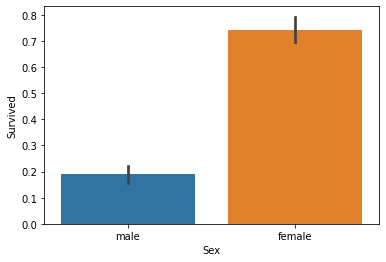

In [11]:
sns.barplot(x='Sex', y = 'Survived', data=t_df)

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

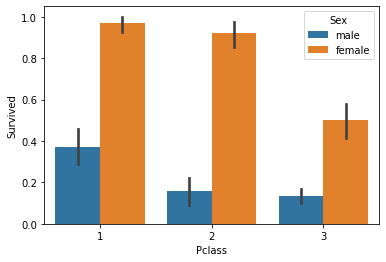

In [12]:
sns.barplot(x='Pclass', y = 'Survived', hue='Sex', data=t_df)

In [13]:
## 연령대 구분 함수
# -1 : unknown
#  5 : Baby
# 12 : Child
# 18 : Teenage
# 25 : Student
# 35 : Young Adult
# 60 : Audlt
# 그 이상 : Elderly

def get_category(age) :
    cat= ''
    if age <= -1 : cat='Unknown'
    elif age <= 5 : cat='Baby' 
    elif age <= 12 : cat = 'Child'        
    elif age <= 18: cat='Teenager' 
    elif age <= 25 : cat='Student' 
    elif age <= 35 : cat='Young Adult'     
    elif age <= 60 : cat='Adult'     
    else : cat = 'Elderly'
    
    return cat
        

In [14]:
plt.figure(figsize=(10,6))
#X축의 값을 순차적으로 표시하기 위한 설정 
group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Elderly']

<Figure size 720x432 with 0 Axes>

In [15]:
## lambda 식 사용 get_category() 함수를 반환값으로 지정
t_df['Age_cat'] = t_df["Age"].apply(lambda x : get_category(x))

In [16]:
t_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_cat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,N,S,Student
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,N,S,Young Adult


<AxesSubplot:xlabel='Age_cat', ylabel='Survived'>

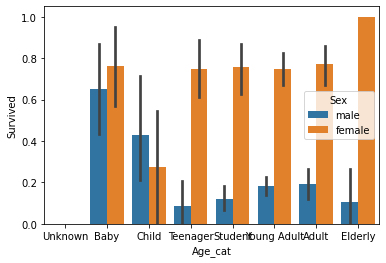

In [18]:
sns.barplot(x='Age_cat', y = 'Survived', hue='Sex', data=t_df, order=group_names)

In [19]:
## labelencoder( ) -- 함수 설명

import numpy as np
from sklearn.preprocessing import LabelEncoder

X_train = np.array(['PC','MOBILE','PC'])
X_test = np.array(['PC','TABLET','MOBILE']) # X_test 에만 TABLET 데이터가 있음

# 라벨 인코더 생성
encoder = LabelEncoder()

In [20]:
# 데이터를 이용해서 문자 데이터를 수치화
encoder.fit(X_train)
X_train_enc = encoder.transform(X_train)
print(X_train_enc)

[1 0 1]


In [21]:
encoder.classes_

array(['MOBILE', 'PC'], dtype='<U6')

In [22]:
## X_test에만 있는 새로운 데이터를 클래스로 추가
for label in np.unique(X_test) : 
    if label not in encoder.classes_ :
        encoder.classes_ = np.append(encoder.classes_,label)

In [23]:
X_test_enc = encoder.transform(X_test)

In [24]:
X_test_enc

array([1, 2, 0], dtype=int64)

In [25]:
##  수치 데이터를 원래 문자 데이터로 -> inverse_transform()
encoder.inverse_transform([2,1,0])

array(['TABLET', 'PC', 'MOBILE'], dtype='<U6')

In [28]:
## 범주형변수 수치화
from sklearn import preprocessing

def encode_features(dataDF) :
    features = ['Cabin','Sex','Embarked']
    for feature in features : 
        le = preprocessing.LabelEncoder()
        le = le.fit(dataDF[feature])
        dataDF[feature] = le.transform(dataDF[feature])
        
    return dataDF

In [29]:
t_df = encode_features(t_df)
t_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_cat
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3,Student
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0,Adult
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3,Young Adult


In [30]:
##  titanic 데이터 전처리 함수
from sklearn.preprocessing import LabelEncoder

# Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(),inplace=True)
    df['Cabin'].fillna('N',inplace=True)
    df['Embarked'].fillna('N',inplace=True)
    df['Fare'].fillna(0,inplace=True)
    return df

# 머신러닝 알고리즘에 불필요한 속성 제거
def drop_features(df):
    df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)
    return df

# 레이블 인코딩 수행. 
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin','Sex','Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

# 앞에서 설정한 Data Preprocessing 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df


In [31]:
## 원본데이터 재 로딩후 feature 데이터셋과 label 데이터 셋 추출
## 데이터
t_df = pd.read_csv('../data/titanic/titanic_train.csv')
y_t_df = t_df['Survived']
X_t_df = t_df.drop('Survived',axis=1)

X_t_df = transform_features(X_t_df)
X_t_df.head(3)

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,1,22.0,1,0,7.2500,7,3
1,1,0,38.0,1,0,71.2833,2,0
2,3,0,26.0,0,0,7.9250,7,3


In [32]:
## 테스트 셋 20%로 학습데이터와 평가데이터 분리
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X_t_df, y_t_df, \
                                                  test_size=0.2, random_state=11)


In [33]:
## 필요 모듈
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [34]:
## 결정트리, RandomForest, 로지스틱회귀 클래스 생성
dt_clf =DecisionTreeClassifier(random_state=11)
rf_clf =RandomForestClassifier(random_state=11)
lr_clf =LogisticRegression()

In [35]:
## 결정트리 학습/예측/평가
dt_clf.fit(X_train , y_train)
dt_pred = dt_clf.predict(X_test)
print('DecisionTreeClassifier 정확도: {0:.4f}'.format(accuracy_score(y_test, dt_pred)))

DecisionTreeClassifier 정확도: 0.7877


In [36]:
## 랜덤포레스트 학습/예측/평가
rf_clf.fit(X_train , y_train)
rf_pred = rf_clf.predict(X_test)
print('RandomForestClassifier 정확도:{0:.4f}'.format(accuracy_score(y_test, rf_pred)))

RandomForestClassifier 정확도:0.8547


In [37]:
## 선형회귀 학습/예측/평가## 선형회귀 학습/예측/평가
lr_clf.fit(X_train , y_train)
lr_pred = lr_clf.predict(X_test)
print('LogisticRegression 정확도: {0:.4f}'.format(accuracy_score(y_test, lr_pred)))

LogisticRegression 정확도: 0.8492


C:\Users\i\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [40]:
from sklearn.model_selection import KFold

def exec_kfold(clf, folds=5):
    # 폴드 세트를 5개인 KFold객체를 생성, 폴드 수만큼 예측결과 저장을 위한  리스트 객체 생성.
    kfold = KFold(n_splits=folds)
    scores = []
    
    # KFold 교차 검증 수행. 
    for iter_count , (train_index, test_index) in enumerate(kfold.split(X_t_df)):
        # X_titanic_df 데이터에서 교차 검증별로 학습과 검증 데이터를 가리키는 index 생성
        X_train, X_test = X_t_df.values[train_index], X_t_df.values[test_index]
        y_train, y_test = y_t_df.values[train_index], y_t_df.values[test_index]
        
        # Classifier 학습, 예측, 정확도 계산 
        clf.fit(X_train, y_train) 
        predictions = clf.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        scores.append(accuracy)
        print("교차 검증 {0} 정확도: {1:.4f}".format(iter_count, accuracy))     
    
    # 5개 fold에서의 평균 정확도 계산. 
    mean_score = np.mean(scores)
    print("평균 정확도: {0:.4f}".format(mean_score)) 

In [41]:
## exec_kfold 호출 - 사용자 정의 함수
exec_kfold(dt_clf, folds=5)

교차 검증 0 정확도: 0.7542
교차 검증 1 정확도: 0.7809
교차 검증 2 정확도: 0.7865
교차 검증 3 정확도: 0.7697
교차 검증 4 정확도: 0.8202
평균 정확도: 0.7823


In [43]:
## cross_val_score 함수 이용해서 교차검증 학습 정확도 확인 cv=5
from sklearn.model_selection import cross_val_score

scores = cross_val_score(dt_clf,X_t_df,y_t_df,cv=5)

for iter_count, accuracy in enumerate(scores) :
    print('교차 검증{0} 정확도 : {1:.4f}'.format(iter_count,accuracy))
    
print('평균 정확도 : {0:.4f}'.format(np.mean(scores)))    

교차 검증0 정확도 : 0.7430
교차 검증1 정확도 : 0.7753
교차 검증2 정확도 : 0.7921
교차 검증3 정확도 : 0.7865
교차 검증4 정확도 : 0.8427
평균 정확도 : 0.7879


In [45]:
from sklearn.model_selection import GridSearchCV
## GridSearchCV 함수 이용해서 하이퍼파라미터 튜닝 후 정확도 확인 cv=5
parameters = {'max_depth':[2,3,5,10],
             'min_samples_split':[2,3,5], 'min_samples_leaf':[1,5,8]}

grid_dclf = GridSearchCV(dt_clf, param_grid=parameters, scoring='accuracy', cv= 5)
grid_dclf.fit(X_train, y_train)

print('GridSearchCV 최적 하이퍼 파라미터 : ', grid_dclf.best_params_)
print('GridSearchCV 최고 정확도 : {0:.4f}'.format(grid_dclf.best_score_))
best_dclf = grid_dclf.best_estimator_

## 예측
pred = best_dclf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('테스트 세트에서의 결정트리 정확도 : {0:.4f}'.format(accuracy))

GridSearchCV 최적 하이퍼 파라미터 :  {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
GridSearchCV 최고 정확도 : 0.7992
테스트 세트에서의 결정트리 정확도 : 0.8715
